In [5]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from collections import Counter

In [2]:
data = pd.read_csv('Kinematics_Data.csv')

In [6]:
from sklearn.model_selection import train_test_split, GridSearchCV, StratifiedKFold
from sklearn.metrics import accuracy_score, confusion_matrix, recall_score, precision_score, f1_score
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier

import lightgbm as lgb

In [3]:
data

,date,time,username,wrist,activity,acceleration_x,acceleration_y,acceleration_z,gyro_x,gyro_y,gyro_z
0,2017-6-30,13:51:15:847724020,viktor,0,0,0.2650,-0.7814,-0.0076,-0.0590,0.0325,-2.9296
1,2017-6-30,13:51:16:246945023,viktor,0,0,0.6722,-1.1233,-0.2344,-0.1757,0.0208,0.1269
2,2017-6-30,13:51:16:446233987,viktor,0,0,0.4399,-1.4817,0.0722,-0.9105,0.1063,-2.4367
3,2017-6-30,13:51:16:646117985,viktor,0,0,0.3031,-0.8125,0.0888,0.1199,-0.4099,-2.9336
4,2017-6-30,13:51:16:846738994,viktor,0,0,0.4814,-0.9312,0.0359,0.0527,0.4379,2.4922
...,...,...,...,...,...,...,...,...,...,...,...
88583,2017-7-9,20:9:15:317911028,viktor,0,0,0.3084,-0.8376,-0.1327,0.4823,2.0124,0.6048
88584,2017-7-9,20:9:15:517889022,viktor,0,0,0.4977,-1.0027,-0.4397,0.1022,-1.2565,-0.0761
88585,2017-7-9,20:9:15:717828989,viktor,0,0,0.4587,-1.1780,-0.2827,-1.4500,-0.2792,-1.2616
88586,2017-7-9,20:9:15:917932987,viktor,0,0,0.2590,-0.8582,-0.0759,-1.5165,0.4560,-1.7755


In [23]:
X = data.iloc[:, 5:]

In [24]:
X

,acceleration_x,acceleration_y,acceleration_z,gyro_x,gyro_y,gyro_z
0,0.2650,-0.7814,-0.0076,-0.0590,0.0325,-2.9296
1,0.6722,-1.1233,-0.2344,-0.1757,0.0208,0.1269
2,0.4399,-1.4817,0.0722,-0.9105,0.1063,-2.4367
3,0.3031,-0.8125,0.0888,0.1199,-0.4099,-2.9336
4,0.4814,-0.9312,0.0359,0.0527,0.4379,2.4922
...,...,...,...,...,...,...
88583,0.3084,-0.8376,-0.1327,0.4823,2.0124,0.6048
88584,0.4977,-1.0027,-0.4397,0.1022,-1.2565,-0.0761
88585,0.4587,-1.1780,-0.2827,-1.4500,-0.2792,-1.2616
88586,0.2590,-0.8582,-0.0759,-1.5165,0.4560,-1.7755


In [25]:
Y1 = data['wrist']
Y2 = data['activity']

# EDA

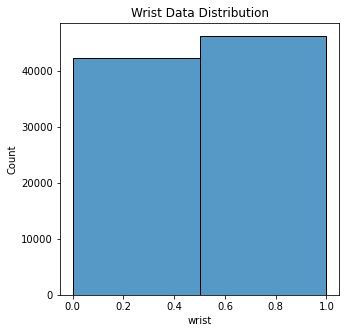

Wrist Label Count
Counter({1: 46258, 0: 42330})


In [33]:
plt.figure(figsize=(5,5))
sns.histplot(Y1, bins=2)
plt.title('Wrist Data Distribution')
plt.show()

print('Wrist Label Count')
print(Counter(Y1))

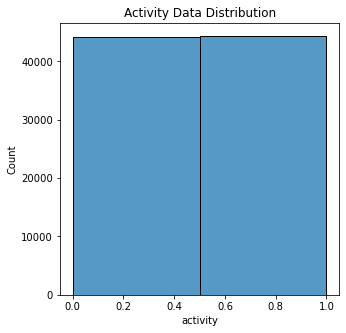

Activity Label Count
Counter({1: 44365, 0: 44223})


In [32]:
plt.figure(figsize=(5,5))
sns.histplot(Y2, bins=2)
plt.title('Activity Data Distribution')
plt.show()

print('Activity Label Count')
print(Counter(Y2))

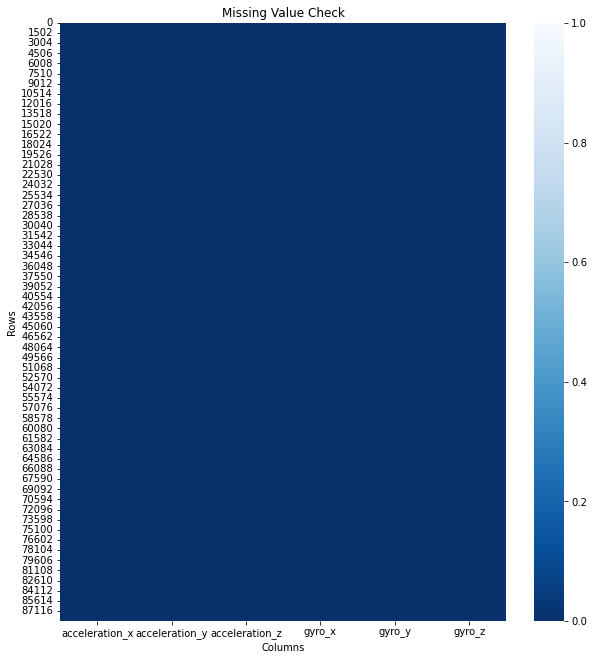

In [36]:
#Missing Value Check
plt.figure(figsize=(10,11))
sns.heatmap(data.iloc[:,5:].isnull(), vmax=1, vmin=0, cmap='Blues_r')
plt.title('Missing Value Check')
plt.xlabel('Columns')
plt.ylabel('Rows')
plt.show()

In [38]:
X.corr(method='pearson')

,acceleration_x,acceleration_y,acceleration_z,gyro_x,gyro_y,gyro_z
acceleration_x,1.000000,-0.265169,-0.552374,-0.021705,-0.004091,-0.060849
acceleration_y,-0.265169,1.000000,0.106220,0.010549,0.072170,-0.022994
acceleration_z,-0.552374,0.106220,1.000000,0.035296,-0.021004,0.049621
gyro_x,-0.021705,0.010549,0.035296,1.000000,0.094011,0.317769
gyro_y,-0.004091,0.072170,-0.021004,0.094011,1.000000,0.287244
gyro_z,-0.060849,-0.022994,0.049621,0.317769,0.287244,1.000000


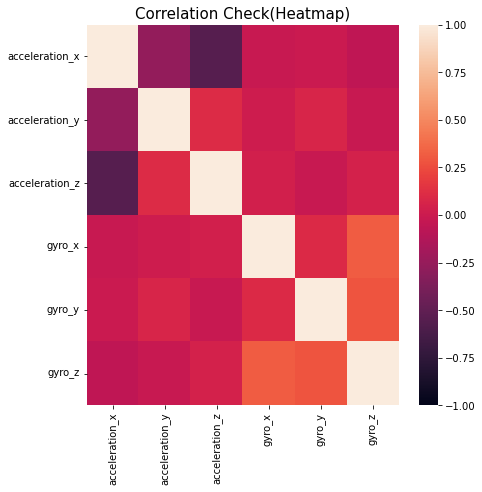

In [41]:
#Correlation Check
plt.figure(figsize=(7,7))
plt.title('Correlation Check(Heatmap)', fontsize = 15)
sns.heatmap(X.corr(method='pearson'), vmin=-1, vmax=1)
plt.show()